<a href="https://colab.research.google.com/github/sayu0303/CONTROLE-2025/blob/main/CONTROLE_0110_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CONTROLE 2025***

*DATA: 01/10*

---

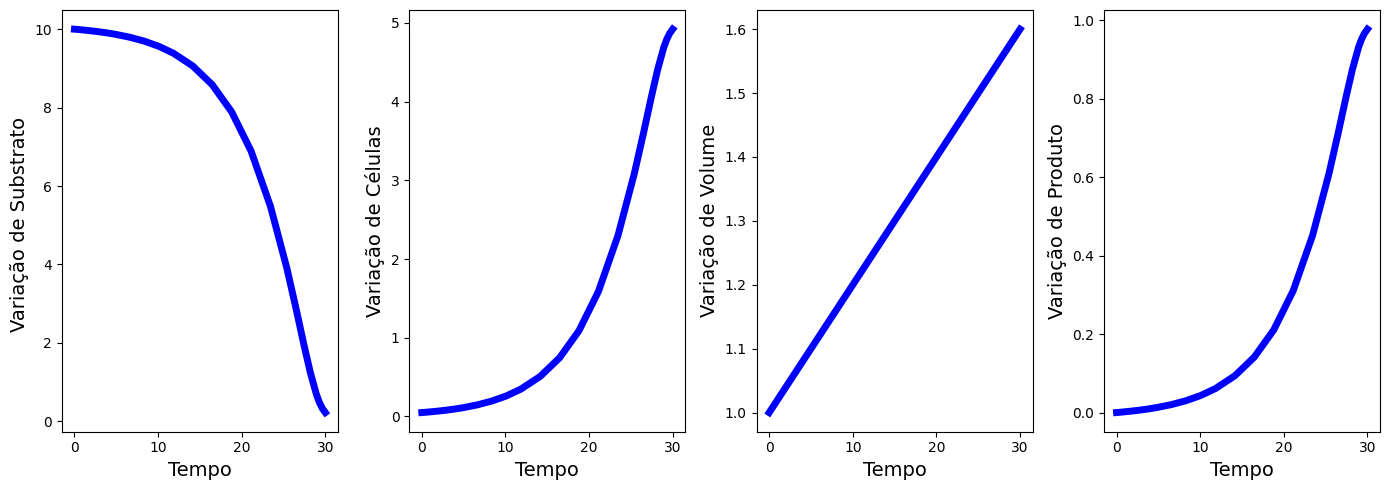

In [13]:
#Definição das bibliotecas utilizadas

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Definição da função

def batelada(t,x,u): #(t, x - variaveis de estado, u - variaveis de entrada)

  #Declaração dos parametros

  umax = 0.2
  Ks = 1.0
  Yxs = 0.5
  Ypx = 0.2

  #Declaração das condições de alimentação (variaveis de entrada)

  Sf = u[0]
  F = u[1]

  #Declaração das condições iniciais (variaveis de estado) /// LEMBRETE: DENTRO DO MODELO NÃO COLOCAR NUMERO NO NOME DAS VARIAVEIS

  X = x[0]
  S = x[1]
  P = x[2]
  V = x[3]

  #Declaração das equações constitutivas

  u = umax*(S/(Ks+S)) #TAXA DE CRESCIMENTO ESPECÍFICO
  rg = u*X #TAXA DE CRESCIMENTO DE CÉLULAS
  rp = Ypx*rg #TAXA DE FORMAÇÃO DE PRODUTO

  #Declaração das equações do modelo

  dV = F
  dX = ((1/V)*((V*rg)-(dV*X)))
  dP = ((1/V)*((V*rp)-(dV*P)))
  dS = ((1/V)*((F*Sf)-((1/Yxs)*V*rg)-(dV*S)))

  #Saida do modelo

  dx = [dX, dS, dP, dV]
  return dx


#Integração do modelo

tspan = [0,30.0]

#Declaração das condições iniciais

x0 = [0.05, 10.0, 0.0, 1.0] #Em ordem de declaração das condições

#Declaração das variações de entradas

u0 = [10.0, 0.02]

# Instanciar o modelo

modelo = lambda t,x: batelada(t,x,u0)

#Utilização do solver

solucao = solve_ivp(modelo, tspan, x0, method = 'BDF')

t = solucao.t
x = solucao.y

#Plotagem dos gráficos
plt.close('all')

# Instanciar uma figura
grafico = plt.figure(1,figsize=[14,5])

plt.subplot(1,4,1)
plt.plot(t,x[1,:], 'b-', lw=5)
plt.ylabel('Variação de Substrato ', fontsize=14)
plt.xlabel('Tempo', fontsize=14)


plt.subplot(1,4,2)
plt.plot(t,x[0,:],'b-', lw=5)
plt.ylabel('Variação de Células', fontsize=14)
plt.xlabel('Tempo', fontsize=14)


plt.subplot(1,4,4)
plt.plot(t,x[2,:],'b-', lw=5)
plt.ylabel('Variação de Produto', fontsize=14)
plt.xlabel('Tempo', fontsize=14)


plt.subplot(1,4,3)
plt.plot(t,x[3,:],'b-', lw=5)
plt.ylabel('Variação de Volume', fontsize=14)
plt.xlabel('Tempo', fontsize=14)



# Ajustar o preenchimento entre os subplots
plt.tight_layout()
plt.show()







